<a href='https://colab.research.google.com/github/ishaqmarashy/red-light-traffic-violation-classification/blob/main/decision%20tree%20classifier.ipynb' target='_parent'><img src='https://colab.research.google.com/assets/colab-badge.svg' alt='Open In Colab'/></a>

## Preprocess Data

In [1]:
import pandas as pd
import os
import numpy as np

csv_filename1 = "data/tv_noaa.csv"
df = pd.read_csv(csv_filename1)

In [2]:
df.drop(columns=['Accident','Violation Type','Charge','Article','Contributed To Accident','Article','HAZMAT','Personal Injury','Fatal'],inplace=True)

In [3]:
df

,Latitude,Longitude,Belts,Property Damage,Commercial License,Commercial Vehicle,Alcohol,Work Zone,State,VehicleType,...,LONGITUDE,AWND,PGTM,PRCP,TMAX,WSF2,WSF5,TMIN,WDF2,WDF5
0,38.997645,-77.027105,No,No,No,No,No,No,MD,02 - Automobile,...,-75.12284,2.2,2301.0,41.1,15.6,9.8,16.1,10.0,300.0,320.0
1,38.997566,-77.109724,No,No,No,No,No,No,MD,02 - Automobile,...,-75.12284,3.4,1356.0,0.5,12.8,7.6,11.6,6.1,230.0,220.0
2,39.223205,-77.260313,No,Yes,No,No,No,No,MD,02 - Automobile,...,-75.12284,2.9,1452.0,0.0,26.7,6.7,10.7,11.1,230.0,230.0
3,39.057987,-76.968677,No,No,No,No,No,No,MD,02 - Automobile,...,-75.12284,4.0,1231.0,0.0,18.9,8.1,11.6,7.2,10.0,360.0
4,38.999282,-77.026098,No,Yes,No,No,No,No,MD,02 - Automobile,...,-75.12284,0.9,2212.0,4.3,20.6,4.5,6.7,11.1,320.0,320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,0.000000,0.000000,No,No,No,No,No,No,MD,02 - Automobile,...,-75.12284,1.5,932.0,0.0,22.2,5.4,8.1,13.3,30.0,30.0
1782,0.000000,0.000000,No,No,No,No,No,No,MD,02 - Automobile,...,-75.12284,1.0,1613.0,0.0,22.2,2.2,3.1,8.3,20.0,360.0
1783,0.000000,0.000000,No,No,No,No,No,No,MD,02 - Automobile,...,-75.12284,0.8,1159.0,0.0,23.3,3.6,6.3,6.7,160.0,200.0
1784,39.144320,-77.067415,No,No,No,No,No,No,MD,02 - Automobile,...,-75.12284,3.8,1519.0,0.0,9.4,8.9,13.0,1.1,290.0,310.0


https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html

https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.html

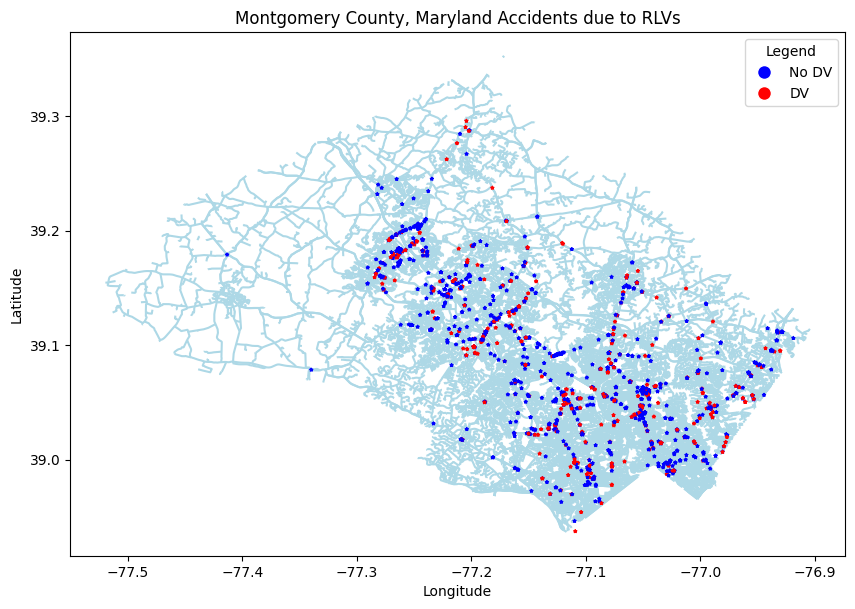

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

filtered_df = df[(df['Latitude'] != 0) & (df['Longitude'] != 0) & (df['Longitude'] <= -76.9)& (df['Latitude'] >=38.93)]
montgomery_shapefile_path = './data/roads/tl_2019_24031_roads.shp'
montgomery_gdf = gpd.read_file(montgomery_shapefile_path)

geometry = [Point(xy) for xy in zip(filtered_df['Longitude'], filtered_df['Latitude'])]
geo_points = gpd.GeoDataFrame(filtered_df, geometry=geometry)

fig, ax = plt.subplots(figsize=(10, 10))

montgomery_gdf.plot(ax=ax, color='lightblue', edgecolor='black', zorder=1)
geo_points.plot(ax=ax, marker='*', color=filtered_df['DV'].map({0: 'blue', 1: 'red'}), markersize=5, zorder=2)

legend_labels = {0: 'No DV', 1: 'DV'}
ax.legend([plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10)],
          [legend_labels[0], legend_labels[1]], title='Legend', loc='upper right')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title('Montgomery County, Maryland Accidents due to RLVs')
plt.show()


In [5]:
df.drop(columns=['Latitude', 'Longitude'],inplace=True)

In [6]:
df.isna().sum()

Belts                 0
Property Damage       0
Commercial License    0
Commercial Vehicle    0
Alcohol               0
Work Zone             0
State                 0
VehicleType           0
Year                  1
Make                  0
Model                 0
Color                 5
Race                  0
Gender                0
Driver City           0
Driver State          0
DL State              1
DV                    0
DATE                  0
LATITUDE              0
LONGITUDE             0
AWND                  0
PGTM                  0
PRCP                  0
TMAX                  0
WSF2                  0
WSF5                  0
TMIN                  0
WDF2                  0
WDF5                  0
dtype: int64

In [7]:
import pandas as pd
from sklearn.impute import SimpleImputer


data_for_imputation = df.copy()

categorical_imputer = SimpleImputer(strategy='most_frequent')

imputed_values = categorical_imputer.fit_transform(data_for_imputation)

imputed_df = pd.DataFrame(imputed_values,columns=df.columns)

df= imputed_df

df


,Belts,Property Damage,Commercial License,Commercial Vehicle,Alcohol,Work Zone,State,VehicleType,Year,Make,...,LONGITUDE,AWND,PGTM,PRCP,TMAX,WSF2,WSF5,TMIN,WDF2,WDF5
0,No,No,No,No,No,No,MD,02 - Automobile,2020.0,LINC,...,-75.12284,2.2,2301.0,41.1,15.6,9.8,16.1,10.0,300.0,320.0
1,No,No,No,No,No,No,MD,02 - Automobile,2023.0,MAZDA,...,-75.12284,3.4,1356.0,0.5,12.8,7.6,11.6,6.1,230.0,220.0
2,No,Yes,No,No,No,No,MD,02 - Automobile,2023.0,VOLK,...,-75.12284,2.9,1452.0,0.0,26.7,6.7,10.7,11.1,230.0,230.0
3,No,No,No,No,No,No,MD,02 - Automobile,2012.0,HONDA,...,-75.12284,4.0,1231.0,0.0,18.9,8.1,11.6,7.2,10.0,360.0
4,No,Yes,No,No,No,No,MD,02 - Automobile,2018.0,HOND,...,-75.12284,0.9,2212.0,4.3,20.6,4.5,6.7,11.1,320.0,320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,No,No,No,No,No,No,MD,02 - Automobile,2005.0,HOND,...,-75.12284,1.5,932.0,0.0,22.2,5.4,8.1,13.3,30.0,30.0
1782,No,No,No,No,No,No,MD,02 - Automobile,1997.0,MITS,...,-75.12284,1.0,1613.0,0.0,22.2,2.2,3.1,8.3,20.0,360.0
1783,No,No,No,No,No,No,MD,02 - Automobile,2005.0,HOND,...,-75.12284,0.8,1159.0,0.0,23.3,3.6,6.3,6.7,160.0,200.0
1784,No,No,No,No,No,No,MD,02 - Automobile,1996.0,ISUZU,...,-75.12284,3.8,1519.0,0.0,9.4,8.9,13.0,1.1,290.0,310.0


In [8]:
df['VehicleType'].value_counts()

VehicleType
02 - Automobile              1580
05 - Light Duty Truck          90
28 - Other                     40
03 - Station Wagon             31
01 - Motorcycle                18
06 - Heavy Duty Truck          15
10 - Transit Bus                6
07 - Truck/Road Tractor         3
08 - Recreational Vehicle       1
20 - Commercial Rig             1
29 - Unknown                    1
Name: count, dtype: int64

In [9]:
def classify_vehicle(vehicle_type):
    if any(category in vehicle_type for category in ['01 - Motorcycle']):
        return 'Light'
    elif any(category in vehicle_type for category in ['28 - Other','29 - Unknown', '03 - Station Wagon', '02 - Automobile']):
        return 'Medium'
    elif any(category in vehicle_type for category in ['05 - Light Duty Truck', '07 - Truck/Road Tractor', '08 - Recreational Vehicle',]):
        return 'Heavy'
    else:
        return 'Very Heavy'
    
df['VehicleType'] = df['VehicleType'].apply(classify_vehicle)

In [10]:
df['Year']=df['Year'].astype(int)
df['Vehicle'] = df[[ 'Year', 'Make', 'Model']].astype(str).apply(lambda x: ', '.join(x), axis=1)
df.drop(columns=['Year', 'Make', 'Model'],inplace=True)

In [11]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['Weekend'] = df['DATE'].dt.dayofweek.apply(lambda x: 1 if x in [5, 6] else 0)
df['Time'] = df['DATE'].dt.time
df['DATE'] = df['DATE'].dt.date

In [12]:
def sine_of_time(time):
    return np.sin(2 * np.pi * (time.hour * 3600 + time.minute * 60 + time.second) / (24 * 3600))

df['SinOfTime'] = df['Time'].apply(sine_of_time)

In [13]:
def categorize_time(time):
    if 5 < time.hour <= 9:
        return 'am-peak'
    elif 12 < time.hour <= 14:
        return 'mid-peak'
    elif 16 < time.hour <= 20:
        return 'pm-peak'
    else:
        return 'non-peak'
    
df['TimeCategory'] = df['Time'].apply(categorize_time)

In [14]:
df=df[['Belts', 'Property Damage', 'Commercial License', 'Commercial Vehicle',
       'Alcohol', 'Work Zone',  'VehicleType', 'Race','SinOfTime','Weekend',
       'Gender', 'DV', 'AWND', 'PGTM', 'PRCP', 'TMAX', 'WSF2', 'WSF5',
       'TMIN', 'WDF2', 'WDF5','TimeCategory']]


In [15]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder()

columns_to_label_encode = ['Belts', 'Property Damage', 'Commercial License', 
                           'Commercial Vehicle', 'Alcohol', 'Gender', 'Work Zone']

columns_to_onehot_encode = ['VehicleType','Race',  'TimeCategory']

for column in columns_to_label_encode:
    df[column] = label_encoder.fit_transform(df[column])

onehot_encoded = onehot_encoder.fit_transform(df[columns_to_onehot_encode]).toarray()
onehot_columns = onehot_encoder.get_feature_names_out(columns_to_onehot_encode)
df_onehot = pd.DataFrame(onehot_encoded, columns=onehot_columns)

df = pd.concat([df, df_onehot], axis=1)

df = df.drop(columns=columns_to_onehot_encode)
df

C:\Users\ishaq\AppData\Local\Temp\ipykernel_15840\210833712.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.fit_transform(df[column])
C:\Users\ishaq\AppData\Local\Temp\ipykernel_15840\210833712.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.fit_transform(df[column])
C:\Users\ishaq\AppData\Local\Temp\ipykernel_15840\210833712.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

,Belts,Property Damage,Commercial License,Commercial Vehicle,Alcohol,Work Zone,SinOfTime,Weekend,Gender,DV,...,Race_ASIAN,Race_BLACK,Race_HISPANIC,Race_NATIVE AMERICAN,Race_OTHER,Race_WHITE,TimeCategory_am-peak,TimeCategory_mid-peak,TimeCategory_non-peak,TimeCategory_pm-peak
0,0,0,0,0,0,0,7.071068e-01,1,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,0,0,0,-3.216245e-16,0,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,1,0,0,0,0,5.000000e-01,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,0,0,0,0,0,-5.000000e-01,0,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0,1,0,0,0,0,5.000000e-01,1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,0,0,0,0,0,0,5.000000e-01,0,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1782,0,0,0,0,0,0,5.000000e-01,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1783,0,0,0,0,0,0,5.000000e-01,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1784,0,0,0,0,0,0,-2.588190e-01,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [16]:
df.columns

Index(['Belts', 'Property Damage', 'Commercial License', 'Commercial Vehicle',
       'Alcohol', 'Work Zone', 'SinOfTime', 'Weekend', 'Gender', 'DV', 'AWND',
       'PGTM', 'PRCP', 'TMAX', 'WSF2', 'WSF5', 'TMIN', 'WDF2', 'WDF5',
       'VehicleType_Heavy', 'VehicleType_Light', 'VehicleType_Medium',
       'VehicleType_Very Heavy', 'Race_ASIAN', 'Race_BLACK', 'Race_HISPANIC',
       'Race_NATIVE AMERICAN', 'Race_OTHER', 'Race_WHITE',
       'TimeCategory_am-peak', 'TimeCategory_mid-peak',
       'TimeCategory_non-peak', 'TimeCategory_pm-peak'],
      dtype='object')

In [17]:
df=df[['Belts', 'Property Damage', 'Commercial License', 'Commercial Vehicle',
       'Alcohol', 'Work Zone', 'SinOfTime', 'Weekend', 'Gender', 'DV',  'AWND', 'PGTM', 'PRCP', 'TMAX', 'WSF2', 'WSF5',
       'TMIN', 'WDF2', 'WDF5', 'VehicleType_Heavy',
       'VehicleType_Light', 'VehicleType_Medium', 'VehicleType_Very Heavy',
       'Race_ASIAN', 'Race_BLACK', 'Race_HISPANIC', 'Race_NATIVE AMERICAN',
       'Race_OTHER', 'Race_WHITE', 'TimeCategory_am-peak',
       'TimeCategory_mid-peak', 'TimeCategory_non-peak',
       'TimeCategory_pm-peak']]

In [18]:
x=df.drop(columns=['DV'])
y=df['DV']
# x['tmpf'] = pd.to_numeric(x['tmpf'], errors='coerce')
# x['dwpf'] = pd.to_numeric(x['dwpf'], errors='coerce')
# x['sknt'] = pd.to_numeric(x['sknt'], errors='coerce')
# x['relh'] = pd.to_numeric(x['relh'], errors='coerce')
# x['alti'] = pd.to_numeric(x['alti'], errors='coerce')
# x['vsby'] = pd.to_numeric(x['vsby'], errors='coerce')
# x['feel'] = pd.to_numeric(x['feel'], errors='coerce')

x['AWND'] = pd.to_numeric(x['AWND'], errors='coerce')
x['PGTM'] = pd.to_numeric(x['PGTM'], errors='coerce')
x['PRCP'] = pd.to_numeric(x['PRCP'], errors='coerce')
x['TMAX'] = pd.to_numeric(x['TMAX'], errors='coerce')
x['WSF2'] = pd.to_numeric(x['WSF2'], errors='coerce')
x['WSF5'] = pd.to_numeric(x['WSF5'], errors='coerce')
x['TMIN'] = pd.to_numeric(x['TMIN'], errors='coerce')
x['WDF2'] = pd.to_numeric(x['WDF2'], errors='coerce')
x['WDF5'] = pd.to_numeric(x['WDF5'], errors='coerce')
y = pd.to_numeric(y, errors='coerce')

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3,
                                                    random_state=42, stratify=y)

## SMOTE

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [20]:
y.value_counts()

DV
0    1227
1     559
Name: count, dtype: int64

In [21]:
print(x.dtypes) 
print(y.dtypes)  

Belts                       int32
Property Damage             int32
Commercial License          int32
Commercial Vehicle          int32
Alcohol                     int32
Work Zone                   int32
SinOfTime                 float64
Weekend                     int64
Gender                      int32
AWND                      float64
PGTM                      float64
PRCP                      float64
TMAX                      float64
WSF2                      float64
WSF5                      float64
TMIN                      float64
WDF2                      float64
WDF5                      float64
VehicleType_Heavy         float64
VehicleType_Light         float64
VehicleType_Medium        float64
VehicleType_Very Heavy    float64
Race_ASIAN                float64
Race_BLACK                float64
Race_HISPANIC             float64
Race_NATIVE AMERICAN      float64
Race_OTHER                float64
Race_WHITE                float64
TimeCategory_am-peak      float64
TimeCategory_m

In [22]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_OS, y_OS = oversample.fit_resample(X_train, y_train)

In [23]:
y_OS.value_counts()

DV
0    859
1    859
Name: count, dtype: int64

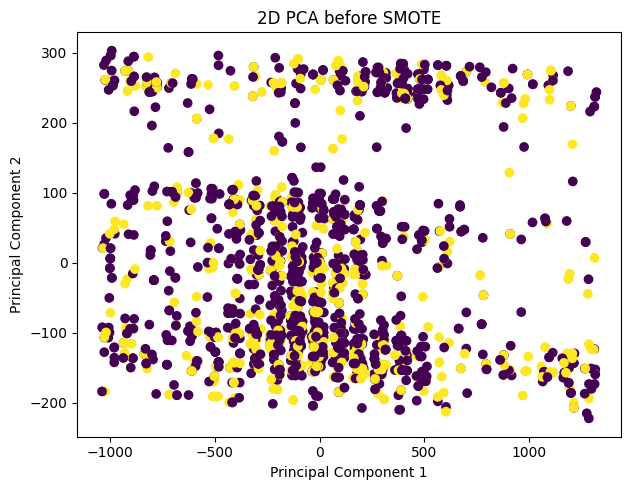

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)

df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
df_pca['Label'] = y

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('2D PCA before SMOTE')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


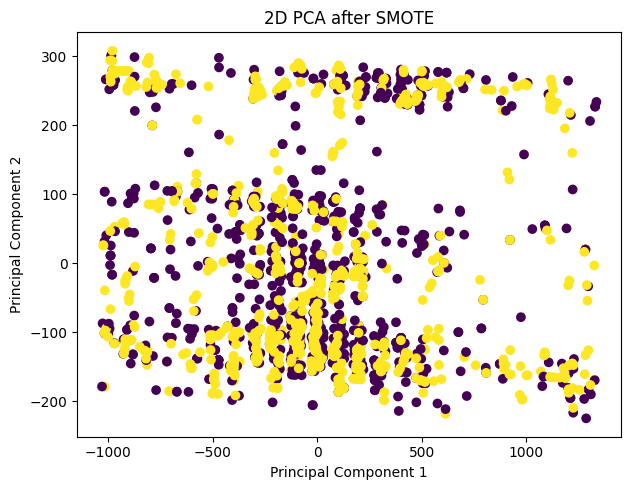

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_OS)

df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
df_pca['Label'] = y_OS

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_OS, cmap='viridis')
plt.title('2D PCA after SMOTE')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchbnn as bnn
import matplotlib.pyplot as plt

seed = 42
torch.manual_seed(seed)
np.random.seed(seed)


In [27]:
X_train

,Belts,Property Damage,Commercial License,Commercial Vehicle,Alcohol,Work Zone,SinOfTime,Weekend,Gender,AWND,...,Race_ASIAN,Race_BLACK,Race_HISPANIC,Race_NATIVE AMERICAN,Race_OTHER,Race_WHITE,TimeCategory_am-peak,TimeCategory_mid-peak,TimeCategory_non-peak,TimeCategory_pm-peak
1741,0,0,0,0,0,0,0.258819,1,1,2.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1530,0,0,0,0,0,0,0.258819,0,0,0.9,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,0,0,0,0,0,-0.500000,0,0,4.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
854,0,0,0,0,0,0,-0.866025,0,0,4.2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1065,0,1,0,0,0,0,0.000000,1,1,6.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,-0.500000,0,0,2.8,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1050,0,0,0,0,0,0,-0.258819,0,1,1.6,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
508,1,1,0,0,0,0,-0.707107,0,1,2.4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1029,0,0,0,0,0,0,-1.000000,0,0,1.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_OS.values)
X_test_normalized = scaler.transform(X_test.values)


os_x_train_tensor = torch.FloatTensor(X_train_normalized)
os_y_train_tensor = torch.FloatTensor(y_OS.values)

X_train_normalized = scaler.transform(X_train.values)

x_train_tensor = torch.FloatTensor(X_train_normalized)
y_train_tensor = torch.FloatTensor(y_train.values)
x_test_tensor = torch.FloatTensor(X_test_normalized)
y_test_tensor = torch.FloatTensor(y_test.values)

In [29]:
len(os_x_train_tensor)

1718

In [30]:
len(os_y_train_tensor)

1718

In [31]:
len(x_train_tensor)

1250

## Ensamble


In [32]:
import pandas as pd

corr_matrix = pd.concat([x,y],axis=1).corr()

target_corr = corr_matrix['DV']

sorted_corr = target_corr.abs().sort_values(ascending=False)

top_features = sorted_corr.index[1:] 

top_corr_values = target_corr[top_features]

result_df = pd.DataFrame({'Feature': top_features, 'Correlation': top_corr_values})
print(result_df)

                                       Feature  Correlation
Property Damage                Property Damage    -0.371355
Belts                                    Belts     0.157717
TimeCategory_non-peak    TimeCategory_non-peak    -0.085160
TimeCategory_am-peak      TimeCategory_am-peak     0.075678
Commercial License          Commercial License     0.057843
VehicleType_Medium          VehicleType_Medium    -0.055274
WDF5                                      WDF5     0.048520
VehicleType_Heavy            VehicleType_Heavy     0.046390
Gender                                  Gender    -0.039646
Race_HISPANIC                    Race_HISPANIC    -0.038434
WSF5                                      WSF5     0.038255
AWND                                      AWND     0.035679
WSF2                                      WSF2     0.034770
TimeCategory_mid-peak    TimeCategory_mid-peak     0.032074
TMAX                                      TMAX    -0.023696
VehicleType_Very Heavy  VehicleType_Very

### SVM

In [34]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
import numpy as np
np.int=np.int_

search_space = {
    'kernel': Categorical([ 'rbf', 'sigmoid']),
    'C': Real(1e-6, 1e+6, 'log-uniform'),  
    'degree': Integer(1, 10),  
    'gamma': Real(1e-6, 1e+3, 'log-uniform'),  
    'coef0': Real(1e-6, 1e+6, 'log-uniform'),  
    'tol': Real(1e-6, 1e+6, 'log-uniform'), 
    'cache_size': Real(1e-6, 1e+6, 'log-uniform'), 
    'class_weight': Categorical(['balanced', None]),
    'max_iter': Integer(1, 10000),
    'decision_function_shape': Categorical(['ovo', 'ovr']),
}

def bayesian_optimization_svm(x_train, y_train, x_test, y_test, search_space, n_calls=100):
    clf = SVC(random_state=42)

    opt = BayesSearchCV(
        clf,
        search_space,
        n_iter=n_calls,
        scoring='accuracy',
        cv=10,
        n_jobs=-1,
        random_state=42
    )

    opt.fit(x_train, y_train)

    print('Best Accuracy: {:.3f}'.format(opt.best_score_))
    print('Best Parameters:', opt.best_params_)
    
    test_predicted = opt.predict(x_test)
    test_accuracy = accuracy_score(test_predicted, y_test)

    print('Accuracy on Test Set: {:.3f}'.format(test_accuracy))
    opt
    return opt

result = bayesian_optimization_svm(x_train_tensor, y_train, x_test_tensor, y_test, search_space, n_calls=100)


Best Accuracy: 0.746
Best Parameters: OrderedDict([('C', 1000000.0), ('cache_size', 24.24760838299682), ('class_weight', None), ('coef0', 1e-06), ('decision_function_shape', 'ovr'), ('degree', 10), ('gamma', 1e-06), ('kernel', 'sigmoid'), ('max_iter', 8427), ('tol', 1e-06)])
Accuracy on Test Set: 0.726


c:\Users\ishaq\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=8427).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [35]:
result.best_params_

OrderedDict([('C', 1000000.0),
             ('cache_size', 24.24760838299682),
             ('class_weight', None),
             ('coef0', 1e-06),
             ('decision_function_shape', 'ovr'),
             ('degree', 10),
             ('gamma', 1e-06),
             ('kernel', 'sigmoid'),
             ('max_iter', 8427),
             ('tol', 1e-06)])

In [36]:
model = SVC(**result.best_params_,
            random_state=42
        )
model.fit(x_train_tensor, y_train)
pred=model.predict(x_test_tensor)
print(classification_report(y_test_tensor,pred))
 

              precision    recall  f1-score   support

         0.0       0.73      0.97      0.83       368
         1.0       0.73      0.20      0.31       168

    accuracy                           0.73       536
   macro avg       0.73      0.58      0.57       536
weighted avg       0.73      0.73      0.67       536



c:\Users\ishaq\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=8427).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
